<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br><br><br><br><br>
<h1>Regression Model Development</h1>
<em>Apprentice Chef Course Case</em><br><br>

Submitted by Mayank Taggar <br>
Hult International Business School <br><br><br><br>
<br><br><br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

<h2> Data Overview</h2>
This step includes understanding the data using, for that I used <br>
&emsp;1 .shape() to know the number of features and observations <br>
&emsp;2 .head() to know the feature head and also see the data <br>
&emsp;3 .info() provides us information about the data types and missing values <br>
&emsp;4 .describe() it helps in understanding the data using descriptive analysis, tells the mean and variance that is important in knowing if the data is normally distributed or not.<br><br>


In [1]:
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.neighbors import KNeighborsRegressor # KNN Regression
from sklearn.ensemble import GradientBoostingRegressor # Gradient Bossting Regression
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor
from sklearn.model_selection import GridSearchCV # CV using Grid Search


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = "./dataset/Apprentice_Chef_Dataset.xlsx"


# reading the file into Python
chef_data = pd.read_excel(io=file)


#Shape to know the size of our data set
chef_data.shape

print(f"""
Size of Original Dataset
------------------------
Observations: {chef_data.shape[0]}
Features:     {chef_data.shape[1]}
""")



Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [2]:

# checking the file
chef_data.head(n = 5)



,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [3]:
#Checking the types of each features
chef_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [4]:
#calling the decribe funtion on the numerical features in the datas sets
chef_data.describe(include = 'number').round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [5]:
#calling the decribe funtion on the object features in the datas sets
chef_data.describe(include = 'object')

,NAME,EMAIL,FIRST_NAME,FAMILY_NAME
count,1946,1946,1946,1899
unique,1946,1946,1442,1070
top,Elia Martell,tanselle@yahoo.com,Jon,Frey
freq,1,1,21,79


In [138]:
#Finding the missing values in each feature
chef_data.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [145]:
#Removing the the missing value and replacing it with "Not_Available"

# instantiating an imputation value
fill_miss = 'Not_Available'

# imputing 'Mas Vnr Area'
chef_data['FAMILY_NAME'] = chef_data['FAMILY_NAME'].fillna(fill_miss)

# rechecking if missing values are still there or not

chef_data.isnull().any().any()

False

In [146]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef_data.iterrows():
    
    # splitting email domain at '@'
    split_email = chef_data.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


In [141]:
#Changing the email into categorical data to form differnt categories

# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
chef_data = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
chef_data = pd.concat([chef_data, email_df['email_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
chef_data.loc[: ,'email_domain'].value_counts()


gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
mcdonalds.com        28
jnj.com              28
cocacola.com         28
apple.com            27
nike.com             27
ibm.com              26
ge.org               26
dupont.com           26
chevron.com          25
microsoft.com        25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
mmm.com              22
caterpillar.com      22
pg.com               22
verizon.com          22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
intel.com            17
homedepot.com        17
Name: email_domain, dtype: int64

In [147]:
# email domain types
personal_email_domain = ['@gmail.com', '@yahoo.com']
company_email_domain  = ['@protonmail.com','@amex.com','@jnj.com','@mcdonalds.com',
                        '@merck.com','@cocacola.com','@nike.com','@apple.com','@ge.org','@dupont.com','@ibm.com',
                        '@chevron.com','@microsoft.com','@exxon.com','@travelers.com','@unitedhealth.com',
                        '@boeing.com','@mmm.com','@pg.com','@caterpillar.com','@verizon.com','@disney.com',
                        '@walmart.com','@visa.com','@pfizer.com','@jpmorgan.com','@unitedtech.com','@goldmansacs.com',
                        '@cisco.com','@intel.com','@homedepot.com']
junk_email_domain = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef_data['email_domain']:
    
    if '@' + domain in personal_email_domain:
        placeholder_lst.append('personal')
        

    elif '@' + domain in company_email_domain:
        placeholder_lst.append('company')
        
    elif '@' + domain in junk_email_domain:
        placeholder_lst.append('junk')

    else:
            print('Unknown')


# concatenating with original DataFrame
chef_data['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef_data['domain_group'].value_counts()

company     980
personal    577
junk        389
Name: domain_group, dtype: int64

In [153]:
#Creating 
chef_data1 = pd.get_dummies(chef_data, columns = ['domain_group'])
chef_data1.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,email_domain,domain_group_company,domain_group_junk,domain_group_personal
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,unitedhealth.com,1,0,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,ge.org,1,0,0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,jnj.com,1,0,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,ge.org,1,0,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,jnj.com,1,0,0


In [154]:
# counting the number of zeroes
TOTAL_MEALS_ORDERED_0  = len(chef_data1['TOTAL_MEALS_ORDERED'][chef_data1['TOTAL_MEALS_ORDERED'] == 0])
TOTAL_PHOTOS_VIEWED_0  = len(chef_data1['TOTAL_PHOTOS_VIEWED'][chef_data1['TOTAL_PHOTOS_VIEWED'] == 0])
WEEKLY_PLAN_0     = len(chef_data1['WEEKLY_PLAN'][chef_data1['WEEKLY_PLAN'] == 0])




# printing a table of the results
print(f"""
                             0\t\tOthers
                           ---------------------
TOTAL_MEALS_ORDERED       | {TOTAL_MEALS_ORDERED_0}\t\t{len(chef_data1) - TOTAL_MEALS_ORDERED_0}
TOTAL_PHOTOS_VIEWED       | {TOTAL_PHOTOS_VIEWED_0}\t{len(chef_data1) - TOTAL_PHOTOS_VIEWED_0}
WEEKLY_PLAN               | {WEEKLY_PLAN_0}\t\t{len(chef_data1) - WEEKLY_PLAN_0}

""")


                             0		Others
                           ---------------------
TOTAL_MEALS_ORDERED       | 0		1946
TOTAL_PHOTOS_VIEWED       | 1140	806
WEEKLY_PLAN               | 468		1478




In [155]:
# dummy variable for photo views  and weekly plan(0 or at least 1). 
chef_data1['has_viewd_photo']   = 0
chef_data1['has_weekly_plan'] = 0

# iterating over each original column to change values in the new feature columns
for index, value in chef_data1.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if chef_data1.loc[index, "TOTAL_PHOTOS_VIEWED"] > 0:
        chef_data1.loc[index, 'has_viewd_photo'] = 1


    # WEEKLY_PLAN
    if chef_data1.loc[index, "WEEKLY_PLAN"] > 0:
        chef_data1.loc[index, 'has_weekly_plan'] = 1
        

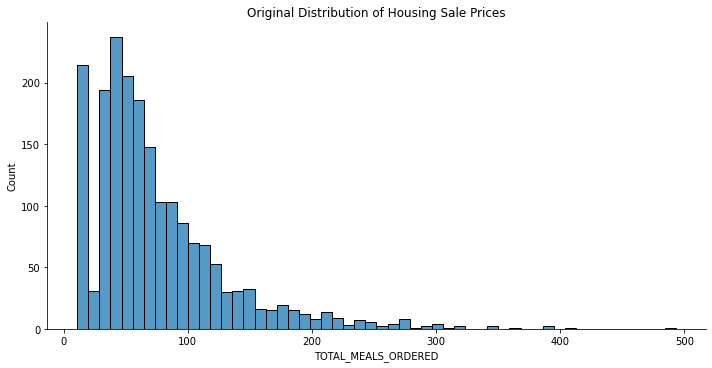

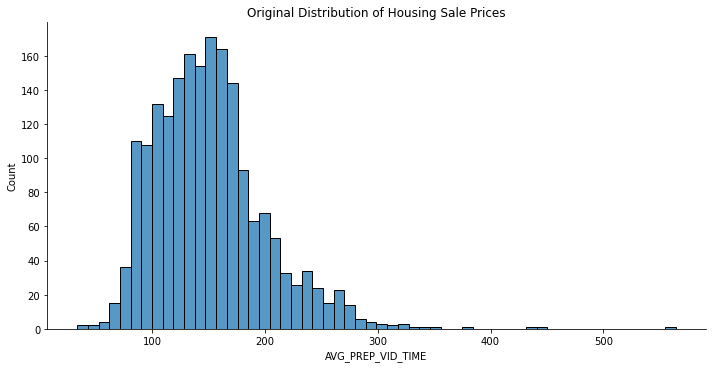

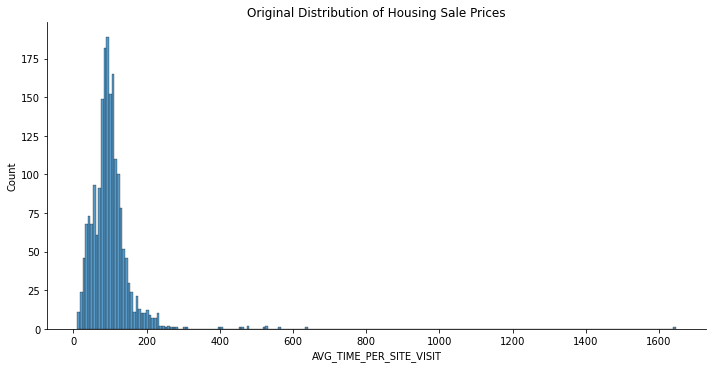

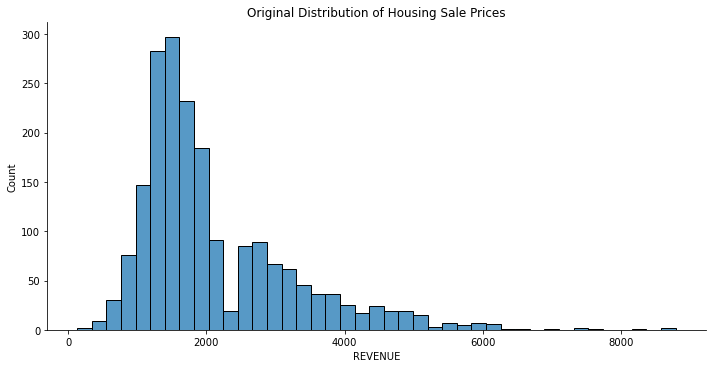

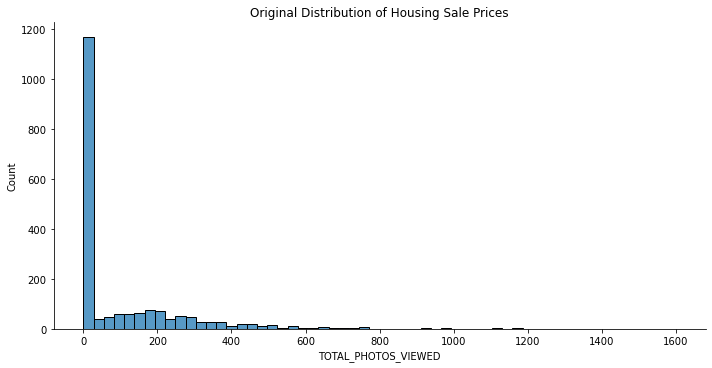

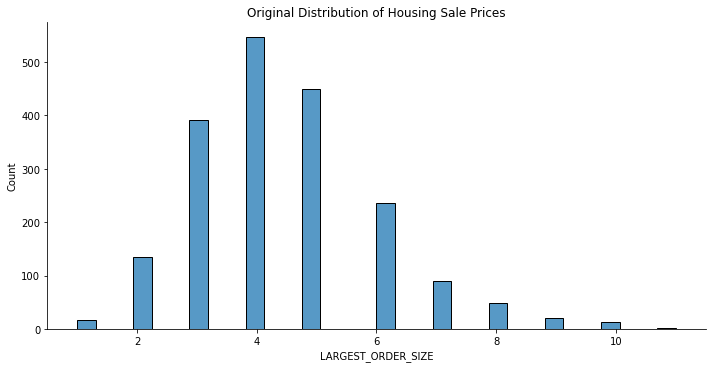

In [156]:
#######Exploring all the continous varibale for normalization###########

# developing a histogram using DISPLOT
sns.displot(data   = chef_data1,
            x      = 'TOTAL_MEALS_ORDERED',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "TOTAL_MEALS_ORDERED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


#########################################

# developing a histogram using DISPLOT
sns.displot(data   = chef_data1,
            x      = 'AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "AVG_PREP_VID_TIME") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

########################################

# developing a histogram using DISPLOT
sns.displot(data   = chef_data1,
            x      = 'AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "AVG_TIME_PER_SITE_VISIT") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

########################################

# developing a histogram using DISPLOT
sns.displot(data   = chef_data1,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

#################################################################

# developing a histogram using DISPLOT
sns.displot(data   = chef_data1,
            x      = 'TOTAL_PHOTOS_VIEWED',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "TOTAL_PHOTOS_VIEWED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

##########################################################

# developing a histogram using DISPLOT
sns.displot(data   = chef_data1,
            x      = 'LARGEST_ORDER_SIZE',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "LARGEST_ORDER_SIZE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [157]:
#  y variable: log transforming Sale_Price and saving it to the dataset
chef_data1['log_revenue'] = np.log10(chef_data1['REVENUE'])

#  x variable: log transforming Sale_Price and saving it to the dataset
chef_data1['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef_data1['AVG_TIME_PER_SITE_VISIT'])
chef_data1['log_AVG_PREP_VID_TIME'] = np.log10(chef_data1['AVG_PREP_VID_TIME'])
chef_data1['log_UNIQUE_MEALS_PURCH'] = np.log10(chef_data1['UNIQUE_MEALS_PURCH'])
chef_data1['log_LARGEST_ORDER_SIZE'] = np.log10(chef_data1['LARGEST_ORDER_SIZE'])
chef_data1['log_TOTAL_MEALS_ORDERED'] = np.log10(chef_data1['TOTAL_MEALS_ORDERED'])


#Checking the new features
chef_data1.head(5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,email_domain,domain_group_company,domain_group_junk,domain_group_personal,has_viewd_photo,has_weekly_plan,log_revenue,log_AVG_TIME_PER_SITE_VISIT,log_AVG_PREP_VID_TIME,log_UNIQUE_MEALS_PURCH,log_LARGEST_ORDER_SIZE,log_TOTAL_MEALS_ORDERED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,unitedhealth.com,1,0,0,0,0,2.594393,1.681241,1.523746,0.778151,0.0,1.146128
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,ge.org,1,0,0,1,1,3.135133,1.605844,1.928396,0.477121,0.0,1.939519
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,jnj.com,1,0,0,0,1,2.903090,1.296007,1.799341,0.845098,0.0,1.176091
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,ge.org,1,0,0,0,1,2.778151,1.954243,1.641474,0.778151,0.0,1.113943
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,jnj.com,1,0,0,1,1,3.173186,1.606166,1.928396,0.903090,0.0,1.672098


In [158]:
#Ceating new features using the exting features to increse the correlation
chef_data1['product_cat_viewed_over_total_logins'] = chef_data1.PRODUCT_CATEGORIES_VIEWED / (chef_data1.PC_LOGINS + chef_data1.MOBILE_LOGINS)  
chef_data1['total_unique_orders'] =  chef_data1.UNIQUE_MEALS_PURCH / chef_data1.TOTAL_MEALS_ORDERED 
chef_data1['total_orders_contact_custServ'] = chef_data1.CONTACTS_W_CUSTOMER_SERVICE / chef_data1.TOTAL_MEALS_ORDERED 
chef_data1['total_orders_without_cancellations'] = chef_data1.TOTAL_MEALS_ORDERED - chef_data1.CANCELLATIONS_BEFORE_NOON 
chef_data1['late_deli_over_total_meals'] = chef_data1.LATE_DELIVERIES / chef_data1.TOTAL_MEALS_ORDERED
chef_data1['total_orders_contact_custServ'] = chef_data1.CONTACTS_W_CUSTOMER_SERVICE / chef_data1.TOTAL_MEALS_ORDERED
#Checking the new features
chef_data1.head(5)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,email_domain,domain_group_company,domain_group_junk,domain_group_personal,has_viewd_photo,has_weekly_plan,log_revenue,log_AVG_TIME_PER_SITE_VISIT,log_AVG_PREP_VID_TIME,log_UNIQUE_MEALS_PURCH,log_LARGEST_ORDER_SIZE,log_TOTAL_MEALS_ORDERED,product_cat_viewed_over_total_logins,total_unique_orders,total_orders_contact_custServ,total_orders_without_cancellations,late_deli_over_total_meals
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,unitedhealth.com,1,0,0,0,0,2.594393,1.681241,1.523746,0.778151,0.0,1.146128,1.428571,0.428571,0.857143,11,0.142857
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,ge.org,1,0,0,1,1,3.135133,1.605844,1.928396,0.477121,0.0,1.939519,1.333333,0.034483,0.091954,87,0.022989
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,jnj.com,1,0,0,0,1,2.903090,1.296007,1.799341,0.845098,0.0,1.176091,0.714286,0.466667,0.733333,12,0.066667
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,ge.org,1,0,0,0,1,2.778151,1.954243,1.641474,0.778151,0.0,1.113943,0.714286,0.461538,0.846154,11,0.230769
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,jnj.com,1,0,0,1,1,3.173186,1.606166,1.928396,0.903090,0.0,1.672098,1.666667,0.170213,0.127660,47,0.170213


In [159]:
#Creating a correlation with REVENUE
chef_data1_corr = chef_data1.corr().round(2)

print(chef_data1_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                                 1.00
log_revenue                             0.95
AVG_PREP_VID_TIME                       0.64
log_AVG_PREP_VID_TIME                   0.63
log_TOTAL_MEALS_ORDERED                 0.61
MEDIAN_MEAL_RATING                      0.61
TOTAL_MEALS_ORDERED                     0.60
total_orders_without_cancellations      0.60
TOTAL_PHOTOS_VIEWED                     0.47
MASTER_CLASSES_ATTENDED                 0.45
LARGEST_ORDER_SIZE                      0.44
log_LARGEST_ORDER_SIZE                  0.42
has_viewd_photo                         0.37
log_AVG_TIME_PER_SITE_VISIT             0.15
AVG_TIME_PER_SITE_VISIT                 0.14
CONTACTS_W_CUSTOMER_SERVICE             0.10
PRODUCT_CATEGORIES_VIEWED               0.03
product_cat_viewed_over_total_logins    0.03
MOBILE_NUMBER                           0.03
domain_group_company                    0.02
PC_LOGINS                               0.02
TASTES_AND_PREFERENCES                  0.01
WEEKLY_PLA

In [160]:
#Dropping the y variable and also the features that have low corelation
#creating explanatory data frame
chef_data_x = chef_data1.drop(['REVENUE', 'log_revenue',
                        'NAME','EMAIL','AVG_PREP_VID_TIME','AVG_TIME_PER_SITE_VISIT',
                        'FIRST_NAME','TOTAL_MEALS_ORDERED','LARGEST_ORDER_SIZE','UNIQUE_MEALS_PURCH',
                        'FAMILY_NAME','email_domain', 'late_deli_over_total_meals', 'CANCELLATIONS_AFTER_NOON',
                        'has_weekly_plan', 'MOBILE_LOGINS', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
                         'REFRIGERATED_LOCKER','EARLY_DELIVERIES'],
                         axis = 1)


# preparing response variables
chef_data_y = chef_data1.loc[ : , 'REVENUE']
log_chef_data_y = chef_data1.loc[ : , 'log_revenue']


#checking the shape of new x variable dataset
chef_data_x.shape



(1946, 25)

In [161]:
#checking the shape of new x variable dataset
log_chef_data_y.shape

(1946,)

In [162]:


# formatting each explanatory variable for statsmodels
for val in chef_data_x:
    print(val, '+')

CROSS_SELL_SUCCESS +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
WEEKLY_PLAN +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
domain_group_company +
domain_group_junk +
domain_group_personal +
has_viewd_photo +
log_AVG_TIME_PER_SITE_VISIT +
log_AVG_PREP_VID_TIME +
log_UNIQUE_MEALS_PURCH +
log_LARGEST_ORDER_SIZE +
log_TOTAL_MEALS_ORDERED +
product_cat_viewed_over_total_logins +
total_unique_orders +
total_orders_contact_custServ +
total_orders_without_cancellations +


In [163]:
# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            chef_data_x,
            log_chef_data_y,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
x-side: {x_train.shape}
y-side: {y_train.shape}

Testing Data
------------
x-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
x-side: (1459, 25)
y-side: (1459,)

Testing Data
------------
x-side: (487, 25)
y-side: (487,)



In [164]:
# merging X_train and y_train so that they can be used in statsmodels
chef_data1_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_revenue ~ CROSS_SELL_SUCCESS +
                                CONTACTS_W_CUSTOMER_SERVICE +
                                MASTER_CLASSES_ATTENDED +
                                MEDIAN_MEAL_RATING +
                                AVG_CLICKS_PER_VISIT +
                                TOTAL_PHOTOS_VIEWED +
                                domain_group_company +
                                domain_group_junk +
                                domain_group_personal +
                                log_TOTAL_MEALS_ORDERED +
                                log_AVG_PREP_VID_TIME +
                                log_LARGEST_ORDER_SIZE +
                                log_UNIQUE_MEALS_PURCH +
                                total_unique_orders +
                                total_orders_contact_custServ  
                                """,
                                data = chef_data1_train)


# Step 2: fit the model based on the data
results = lm_best.fit()


# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     306.0
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:32:01   Log-Likelihood:                 1216.8
No. Observations:                1459   AIC:                            -2404.
Df Residuals:                    1444   BIC:                            -2324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [165]:
# declaring set of x-variables
x_var_chef = ['CROSS_SELL_SUCCESS','CONTACTS_W_CUSTOMER_SERVICE',
                                'MASTER_CLASSES_ATTENDED',
                                'MEDIAN_MEAL_RATING',
                                'AVG_CLICKS_PER_VISIT',
                                'TOTAL_PHOTOS_VIEWED',
                                'domain_group_company',
                                'domain_group_junk',
                                'domain_group_personal',
                                'log_TOTAL_MEALS_ORDERED',
                                'log_AVG_PREP_VID_TIME',
                                'log_LARGEST_ORDER_SIZE',
                                'log_UNIQUE_MEALS_PURCH',
                                'total_unique_orders',
                                'total_orders_contact_custServ']





# looping to make x-variables suitable for statsmodels
for val in x_var_chef:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
CONTACTS_W_CUSTOMER_SERVICE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
domain_group_company +
domain_group_junk +
domain_group_personal +
log_TOTAL_MEALS_ORDERED +
log_AVG_PREP_VID_TIME +
log_LARGEST_ORDER_SIZE +
log_UNIQUE_MEALS_PURCH +
total_unique_orders +
total_orders_contact_custServ +


In [166]:
# Preparing a DataFrame based the the analysis above
ols_data   = chef_data1.loc[ : , x_var_chef]


# Preparing the target variable
chef_y = chef_data1.loc[ : , 'log_revenue']



# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data_x,     # x-variables
            log_chef_data_y,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_chef_data_y,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [167]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7479
OLS Testing Score  : 0.75
OLS Train-Test Gap : 0.0021


In [168]:
# zipping each feature name to its coefficient
lr_model_values = zip(chef_data_x[x_var_chef].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.98)
('CROSS_SELL_SUCCESS', -0.02)
('CONTACTS_W_CUSTOMER_SERVICE', 0.03)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.05)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('domain_group_company', -0.0)
('domain_group_junk', -0.01)
('domain_group_personal', 0.01)
('log_TOTAL_MEALS_ORDERED', 0.12)
('log_AVG_PREP_VID_TIME', 0.48)
('log_LARGEST_ORDER_SIZE', -0.1)
('log_UNIQUE_MEALS_PURCH', -0.21)
('total_unique_orders', 0.21)
('total_orders_contact_custServ', -0.46)


In [169]:
# importing libraries
import pandas as pd # data science essentials
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model

In [170]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7472
Testing Score : 0.7504
ARD Train-Test Gap : 0.0032


In [171]:
# zipping each feature name to its coefficient
ard_model_values = zip(chef_data_x.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.83)
('CROSS_SELL_SUCCESS', -0.01356)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02888)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.00855)
('PC_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('MASTER_CLASSES_ATTENDED', 0.02644)
('MEDIAN_MEAL_RATING', 0.05766)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('domain_group_company', 0.0)
('domain_group_junk', 0.0)
('domain_group_personal', 0.01192)
('has_viewd_photo', 0.02545)
('log_AVG_TIME_PER_SITE_VISIT', -0.00783)
('log_AVG_PREP_VID_TIME', 0.50435)
('log_UNIQUE_MEALS_PURCH', -0.20428)
('log_LARGEST_ORDER_SIZE', -0.1012)
('log_TOTAL_MEALS_ORDERED', 0.12323)
('product_cat_viewed_over_total_logins', 0.00888)
('total_unique_orders', 0.18457)
('total_orders_contact_custServ', -0.43607)
('total_orders_without_cancellations', 0.0)


In [172]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.83)
('CROSS_SELL_SUCCESS', -0.01356)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02888)
('MOBILE_NUMBER', 0.0)
('TASTES_AND_PREFERENCES', 0.00855)
('WEEKLY_PLAN', 0.0)
('MASTER_CLASSES_ATTENDED', 0.02644)
('MEDIAN_MEAL_RATING', 0.05766)
('TOTAL_PHOTOS_VIEWED', 0.0)
('domain_group_junk', 0.0)
('domain_group_personal', 0.01192)
('has_viewd_photo', 0.02545)
('log_AVG_TIME_PER_SITE_VISIT', -0.00783)
('log_AVG_PREP_VID_TIME', 0.50435)
('log_UNIQUE_MEALS_PURCH', -0.20428)
('log_LARGEST_ORDER_SIZE', -0.1012)
('log_TOTAL_MEALS_ORDERED', 0.12323)
('product_cat_viewed_over_total_logins', 0.00888)
('total_unique_orders', 0.18457)
('total_orders_contact_custServ', -0.43607)


In [173]:
print("ARD is slightly better than OLS looking at the table below and hence the chosen model is ARD.")

print(f"""
Model      Train Score      Test Score    Train-Test Gap      Model Size
-----      -----------      ----------    -------------      -------------
OLS        {lr_train_score}            {lr_test_score}          {lr_test_gap}             {len(lr_model_lst)}
ARD        {ard_train_score}            {ard_test_score}        {ard_test_gap}             {len(ard_model_lst)}

""")

print(f"""
Model   Model Coefficients and Variables
-----  ----------------------------------
{'OLS'}    {lr_model_lst}


{'ARD'}    {ard_model_lst}

""")


ARD is slightly better than OLS looking at the table below and hence the chosen model is ARD.

Model      Train Score      Test Score    Train-Test Gap      Model Size
-----      -----------      ----------    -------------      -------------
OLS        0.7479            0.75          0.0021             16
ARD        0.7472            0.7504        0.0032             20



Model   Model Coefficients and Variables
-----  ----------------------------------
OLS    [('intercept', 1.98), ('CROSS_SELL_SUCCESS', -0.02), ('CONTACTS_W_CUSTOMER_SERVICE', 0.03), ('MASTER_CLASSES_ATTENDED', 0.03), ('MEDIAN_MEAL_RATING', 0.05), ('AVG_CLICKS_PER_VISIT', -0.0), ('TOTAL_PHOTOS_VIEWED', 0.0), ('domain_group_company', -0.0), ('domain_group_junk', -0.01), ('domain_group_personal', 0.01), ('log_TOTAL_MEALS_ORDERED', 0.12), ('log_AVG_PREP_VID_TIME', 0.48), ('log_LARGEST_ORDER_SIZE', -0.1), ('log_UNIQUE_MEALS_PURCH', -0.21), ('total_unique_orders', 0.21), ('total_orders_contact_custServ', -0.46)]


ARD    [